In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
p_wave = np.fromfile("/mnt/d/Project/LF_Extrapolation_Research/data/vp.bin", dtype=np.float32).reshape((2301, 751)).T
rho = np.fromfile("/mnt/d/Project/LF_Extrapolation_Research/data/rho.bin", dtype=np.float32).reshape((2301, 751)).T

[0, 9200, 3000, 0]


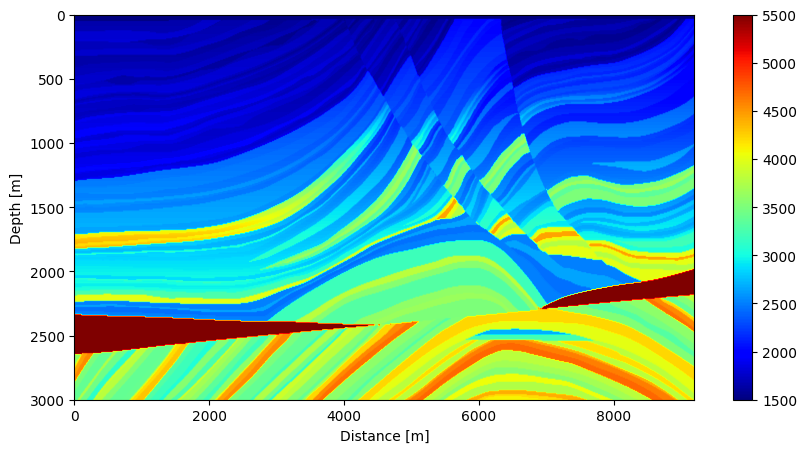

In [3]:
border = [0, (p_wave.shape[1]-1)*4, (p_wave.shape[0]-1)*4, 0]
plt.figure(figsize=(10, 5))
plt.imshow(p_wave, aspect="auto", cmap="jet", extent = border)
plt.colorbar()
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")

print(border)

Text(0, 0.5, 'Depth [m]')

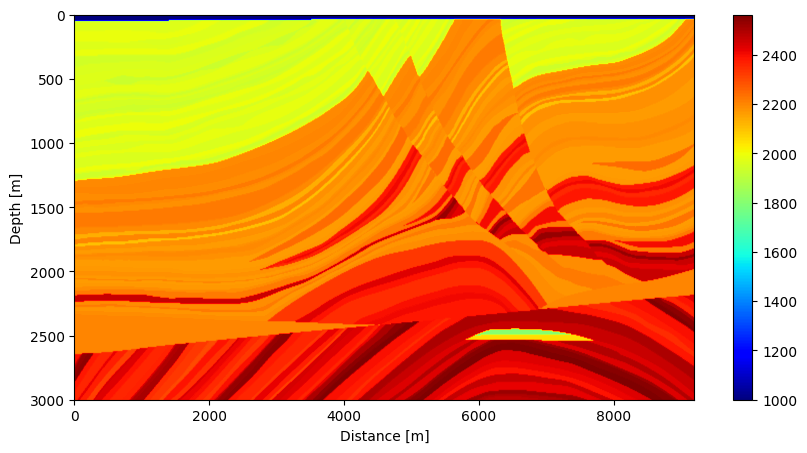

In [4]:
plt.figure(figsize=(10, 5))
plt.imshow(rho, aspect="auto", cmap="jet", extent = border)
plt.colorbar()
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")

## Resample velocity

In [37]:
import cv2

p_wave_resize = cv2.resize(p_wave, (920, 300),  interpolation = cv2.INTER_AREA)
rho_resize = cv2.resize(rho, (920, 300),  interpolation = cv2.INTER_AREA)

print(f"Before :{p_wave.shape} and after:{p_wave_resize.shape}")
print(border)

Before :(751, 2301) and after:(300, 920)
[0, 9200, 3000, 0]


Text(0, 0.5, 'Depth [m]')

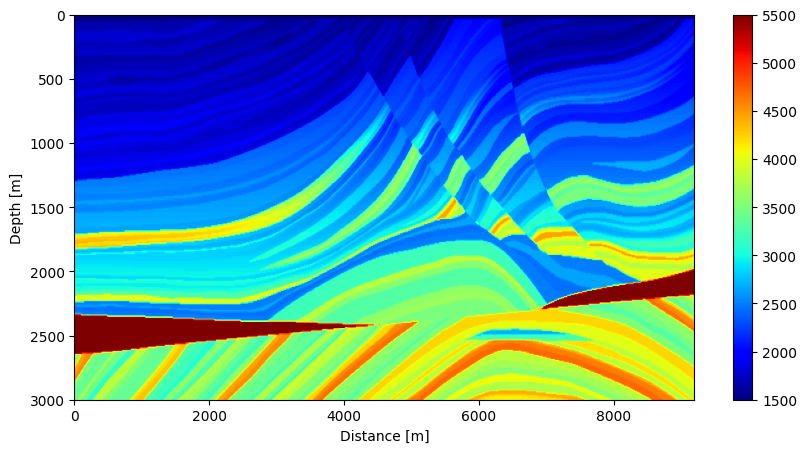

In [35]:
border_resize = [0, p_wave_resize.shape[1]*10, p_wave_resize.shape[0]*10, 0]

plt.figure(figsize=(10, 5))
plt.imshow(p_wave_resize, aspect="auto", cmap="jet", extent=border_resize)
plt.colorbar()
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")

Text(0, 0.5, 'Depth [m]')

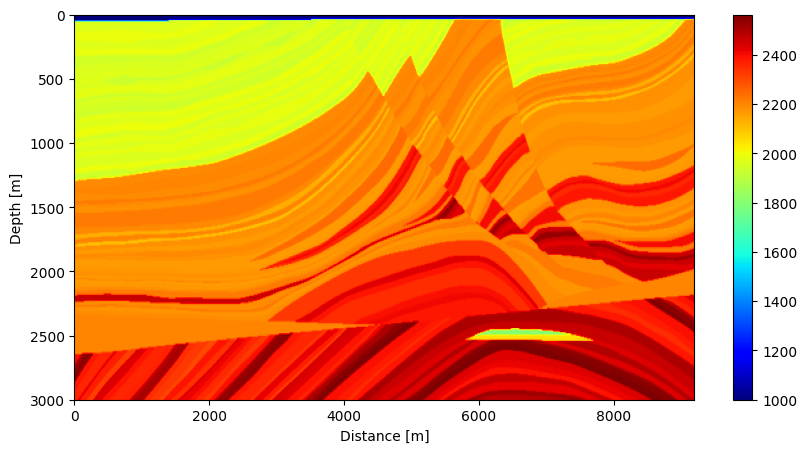

In [38]:
border_resize = [0, p_wave_resize.shape[1]*10, p_wave_resize.shape[0]*10, 0]

plt.figure(figsize=(10, 5))
plt.imshow(rho_resize, aspect="auto", cmap="jet", extent=border_resize)
plt.colorbar()
plt.xlabel("Distance [m]")
plt.ylabel("Depth [m]")

In [41]:
import h5py

with h5py.File('../data/velocity/p_wave_marm.hdf5', 'w') as f: 
    dset = f.create_dataset("data", data = p_wave_resize)
